In [1]:
from nltk.corpus.reader import ConllCorpusReader
train = ConllCorpusReader('CONLL2003', 'train.txt', ['words', 'pos', 'ignore', 'chunk'])
training_features = []
training_gold_labels = []

for token, pos, ne_label in train.iob_words():
    a_dict = {
        'words': token,
        'pos': pos,
        'labels': ne_label
       # add features
    }
    training_features.append({'words': a_dict['words'], 'pos': a_dict['pos']})
    training_gold_labels.append(a_dict['labels'])
print(training_features[:10])
training_gold_labels[:10]
cutoff = len(training_features)
print(cutoff)

[{'words': 'EU', 'pos': 'NNP'}, {'words': 'rejects', 'pos': 'VBZ'}, {'words': 'German', 'pos': 'JJ'}, {'words': 'call', 'pos': 'NN'}, {'words': 'to', 'pos': 'TO'}, {'words': 'boycott', 'pos': 'VB'}, {'words': 'British', 'pos': 'JJ'}, {'words': 'lamb', 'pos': 'NN'}, {'words': '.', 'pos': '.'}, {'words': 'Peter', 'pos': 'NNP'}]
203621


In [2]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Thomas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
import pandas as pd
from nltk import pos_tag
test = pd.read_csv("NER-final-test.tsv",delimiter = '\t')
convert = pos_tag(test.token.tolist())
new_pos = []
for word, pos in convert:
    new_pos.append(pos)
test['PoS'] = new_pos
test.to_csv('NER-final-test-PoS.csv', index=False)
len(convert)

214

In [4]:
test_gold_labels = test['BIO NER tag'].tolist()
test_features = []
for word, pos in convert:
    test_features.append({'words': word, 'pos': pos})

print(training_features[:10])
training_gold_labels[:10]

[{'words': 'EU', 'pos': 'NNP'}, {'words': 'rejects', 'pos': 'VBZ'}, {'words': 'German', 'pos': 'JJ'}, {'words': 'call', 'pos': 'NN'}, {'words': 'to', 'pos': 'TO'}, {'words': 'boycott', 'pos': 'VB'}, {'words': 'British', 'pos': 'JJ'}, {'words': 'lamb', 'pos': 'NN'}, {'words': '.', 'pos': '.'}, {'words': 'Peter', 'pos': 'NNP'}]


['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'B-PER']

In [5]:
from collections import Counter 
print("Training Set:\n")
print("Instances - %s\n" %(len(training_gold_labels)))
print("frequency of labels:")
for label, count in Counter(training_gold_labels).items():
    print('%s - %s'%(label,round((count/len(training_gold_labels))*100,2)))
print("\n\nTest Set:\n")
print("Instances - %s\n" %(len(test_gold_labels)))
print("frequency of labels:")
for label, count in Counter(test_gold_labels).items():
    print('%s - %s'%(label,round((count/len(test_gold_labels))*100,2)))

Training Set:

Instances - 203621

frequency of labels:
B-ORG - 3.1
O - 83.28
B-MISC - 1.69
B-PER - 3.24
I-PER - 2.22
B-LOC - 3.51
I-ORG - 1.82
I-MISC - 0.57
I-LOC - 0.57


Test Set:

Instances - 214

frequency of labels:
O - 85.51
B-ORG - 1.87
I-ORG - 1.4
B-LOC - 1.87
B-MISC - 1.4
B-PER - 2.8
I-PER - 3.74
I-MISC - 0.47
I-LOC - 0.93


In [6]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
the_array = training_features
the_array.extend(test_features)
the_array = vec.fit_transform(the_array)
training = the_array[:cutoff]
testing = the_array[cutoff:]

In [7]:
from sklearn import svm
from sklearn.metrics import classification_report

lin_clf = svm.LinearSVC()
lin_clf.fit(training, training_gold_labels)
predict = lin_clf.predict(testing)

In [8]:
reportOne = classification_report(test_gold_labels, predict)
print(reportOne)

              precision    recall  f1-score   support

       B-LOC       0.50      0.50      0.50         4
      B-MISC       0.67      0.67      0.67         3
       B-ORG       0.00      0.00      0.00         4
       B-PER       0.75      0.50      0.60         6
       I-LOC       0.67      1.00      0.80         2
      I-MISC       0.00      0.00      0.00         1
       I-ORG       0.50      0.67      0.57         3
       I-PER       0.64      0.88      0.74         8
           O       0.99      1.00      1.00       183

    accuracy                           0.94       214
   macro avg       0.52      0.58      0.54       214
weighted avg       0.93      0.94      0.93       214



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
j = 0
number_wrong = 0
number_right = 0
for i in test_gold_labels:
    if i == predict[j]:
        number_right += 1
    else:
        print(test_features[j])
        print('label: %s' %(i))
        print('predict: %s' %(predict[j]))
        number_wrong += 1
    j+=1
print(f'Number of Correct: {number_right}')
print(f'Number of Incorrect: {number_wrong}')

{'words': 'Warner', 'pos': 'NNP'}
label: B-ORG
predict: I-PER
{'words': 'New', 'pos': 'NNP'}
label: B-ORG
predict: B-LOC
{'words': 'York', 'pos': 'NNP'}
label: I-ORG
predict: I-LOC
{'words': 'Soho', 'pos': 'NNP'}
label: B-LOC
predict: I-PER
{'words': 'Cuba', 'pos': 'NNP'}
label: B-PER
predict: B-LOC
{'words': 'African', 'pos': 'JJ'}
label: B-MISC
predict: I-MISC
{'words': 'American', 'pos': 'JJ'}
label: I-MISC
predict: B-MISC
{'words': 'Navy', 'pos': 'NNP'}
label: B-ORG
predict: I-ORG
{'words': 'Amsterdam', 'pos': 'NNP'}
label: B-LOC
predict: I-ORG
{'words': 'Blauwbrug', 'pos': 'NNP'}
label: B-ORG
predict: I-PER
{'words': 'Dame', 'pos': 'NNP'}
label: B-PER
predict: I-PER
{'words': 'Maggie', 'pos': 'NNP'}
label: I-PER
predict: B-PER
{'words': 'Mr.', 'pos': 'NNP'}
label: B-PER
predict: O
Number of Correct: 201
Number of Incorrect: 13


In [10]:
training_words = []
for token, pos, ne_label in train.iob_words():
    a_dict = {
        'words': token,
        'pos' : pos,
        'ne_label' : ne_label
    }
    training_words.append(a_dict['words'])

test_words = []

for word, pos in convert:
    test_words.append(word)

In [11]:
import gensim
word_embedding_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/Thomas/Documents/GitHub/ba-text-mining/lab_sessions/lab4/GoogleNews-vectors-negative300.bin', binary=True)

In [20]:
from sklearn.metrics import classification_report
both_input=[]
for token in (training_words + test_words): 
    if token in word_embedding_model:
        vector=word_embedding_model[token]
    else: 
        vector=[0]*300
    both_input.append(vector)

cutoff = len(training_words)
training_em = both_input[:cutoff]
testing_em = both_input[cutoff:]
lin_clf = svm.LinearSVC()
lin_clf.fit(training_em, training_gold_labels)
predict_em = lin_clf.predict(testing_em)
reportTwo = classification_report(test_gold_labels, predict_em)
print(reportTwo)

              precision    recall  f1-score   support

       B-LOC       0.60      0.75      0.67         4
      B-MISC       0.75      1.00      0.86         3
       B-ORG       0.33      0.25      0.29         4
       B-PER       0.60      0.50      0.55         6
       I-LOC       0.67      1.00      0.80         2
      I-MISC       0.00      0.00      0.00         1
       I-ORG       0.00      0.00      0.00         3
       I-PER       0.67      0.50      0.57         8
           O       0.97      1.00      0.99       183

    accuracy                           0.93       214
   macro avg       0.51      0.56      0.52       214
weighted avg       0.91      0.93      0.92       214



c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
j = 0
number_wrong = 0
number_right = 0
for i in test_gold_labels:
    if i == predict_em[j]:
        #print('correct')
        number_right += 1
    else:
        #print('false')
        print(test_features[j])
        print('label: %s' %(i))
        print('predict: %s' %(predict_em[j]))
        number_wrong += 1
    j+=1
print(f'Number of Correct: {number_right}')
print(f'Number of Incorrect: {number_wrong}')

{'words': 'Warner', 'pos': 'NNP'}
label: B-ORG
predict: I-PER
{'words': 'Brothers', 'pos': 'NNPS'}
label: I-ORG
predict: B-ORG
{'words': 'New', 'pos': 'NNP'}
label: B-ORG
predict: B-LOC
{'words': 'York', 'pos': 'NNP'}
label: I-ORG
predict: I-LOC
{'words': 'University', 'pos': 'NNP'}
label: I-ORG
predict: O
{'words': 'Austen', 'pos': 'NNP'}
label: I-PER
predict: B-PER
{'words': 'Cuba', 'pos': 'NNP'}
label: B-PER
predict: B-LOC
{'words': 'Jr.', 'pos': 'NNP'}
label: I-PER
predict: O
{'words': 'American', 'pos': 'JJ'}
label: I-MISC
predict: B-MISC
{'words': 'Blauwbrug', 'pos': 'NNP'}
label: B-ORG
predict: O
{'words': 'Dame', 'pos': 'NNP'}
label: B-PER
predict: I-PER
{'words': 'Maggie', 'pos': 'NNP'}
label: I-PER
predict: B-PER
{'words': 'Mr.', 'pos': 'NNP'}
label: B-PER
predict: O
{'words': 'Kruno', 'pos': 'NNP'}
label: I-PER
predict: O
{'words': 'Los', 'pos': 'NNP'}
label: B-LOC
predict: B-ORG
Number of Correct: 199
Number of Incorrect: 15


In [14]:
import pandas as pd
import numpy as np
test = pd.read_csv("NER-final-test.tsv",delimiter = '\t')
j = 0
sent = 0
sentence = []
sentences = []
for i in test.token.tolist():
    if (j+1) == len(test.token.tolist()):
        sentence.append(test.token[j])
        sentences.append(sentence)
        print(sentence)
    elif test['sentence id'][j] == sent:
        sentence.append(test.token[j])
    else: 
        print(sentence)
        sent += 1
        sentences.append(sentence)
        sentence = []
        sentence.append(test.token[j])
    j += 1

['It', 'took', 'eight', 'years', 'for', 'Warner', 'Brothers', 'to', 'recover', 'from', 'the', 'disaster', 'that', 'was', 'this', 'movie', '.']
['All', 'the', 'New', 'York', 'University', 'students', 'love', 'this', 'diner', 'in', 'Soho', 'so', 'it', 'makes', 'for', 'a', 'fun', 'young', 'atmosphere', '.']
['This', 'Italian', 'place', 'is', 'really', 'trendy', 'but', 'they', 'have', 'forgotten', 'about', 'the', 'most', 'important', 'part', 'of', 'a', 'restaurant', ',', 'the', 'food', '.']
['In', 'conclusion', ',', 'my', 'review', 'of', 'this', 'book', 'would', 'be', ':', 'I', 'like', 'Jane', 'Austen', 'and', 'understand', 'why', 'she', 'is', 'famous', '.']
['The', 'story', 'of', 'this', 'movie', 'is', 'focused', 'on', 'Carl', 'Brashear', 'played', 'by', 'Cuba', 'Gooding', 'Jr.', 'who', 'wants', 'to', 'be', 'the', 'first', 'African', 'American', 'deep', 'sea', 'diver', 'in', 'the', 'Navy', '.']
['Chris', "O'Donnell", 'stated', 'that', 'while', 'filming', 'for', 'this', 'movie', ',', 'he',

In [15]:
from simpletransformers.ner import NERModel
#sentences = ["Example sentence 1", "Example sentence 2"]
englishmodel = NERModel(
        model_type="bert",
        model_name="dslim/bert-base-NER",
        use_cuda=False
)

C:\Users\Thomas\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
str_sentences = []
punctuations = ['.',',',':','-','!']
string = ""
start = True
for i in sentences:
    for j in i:
        if start == True:
                string = "%s%s" %(string, j)
                start = False
        else: 
            string = "%s %s" %(string, j)
    str_sentences.append(string)
    string = ""
    start = True
str_sentences[9]

"I always have loved English novels , but I just could n't get into this one ."

In [17]:
predictions, raw_outputs = englishmodel.predict(str_sentences)

Running Prediction: 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]


In [18]:
pred = []
for i in predictions:
    for j in i:
        for k, v in j.items():
            pred.append(v)
#predictions

len(pred)
reportThree = classification_report(test_gold_labels, pred)
print(reportThree)

              precision    recall  f1-score   support

       B-LOC       0.80      1.00      0.89         4
      B-MISC       1.00      1.00      1.00         3
       B-ORG       1.00      0.75      0.86         4
       B-PER       0.67      0.67      0.67         6
       I-LOC       1.00      1.00      1.00         2
      I-MISC       1.00      1.00      1.00         1
       I-ORG       1.00      1.00      1.00         3
       I-PER       1.00      0.75      0.86         8
           O       0.99      1.00      0.99       183

    accuracy                           0.98       214
   macro avg       0.94      0.91      0.92       214
weighted avg       0.98      0.98      0.98       214



In [19]:
j = 0
number_wrong = 0
number_right = 0
for i in test_gold_labels:
    if i == pred[j]:
        #print('correct')
        number_right += 1
    else:
        #print('false')
        print(test_features[j])
        print('label: %s' %(i))
        print('predict: %s' %(pred[j]))
        number_wrong += 1
    j+=1
print(number_right)
print(number_wrong)

{'words': 'Blauwbrug', 'pos': 'NNP'}
label: B-ORG
predict: B-LOC
{'words': 'Dame', 'pos': 'NNP'}
label: B-PER
predict: O
{'words': 'Maggie', 'pos': 'NNP'}
label: I-PER
predict: B-PER
{'words': 'Mr.', 'pos': 'NNP'}
label: B-PER
predict: O
{'words': 'Kruno', 'pos': 'NNP'}
label: I-PER
predict: B-PER
209
5


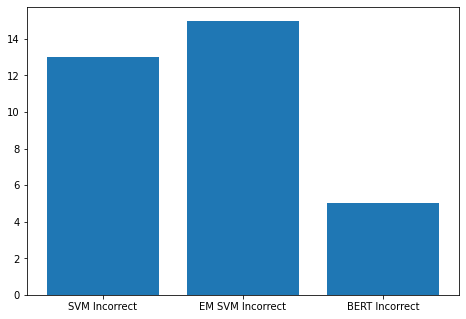

In [33]:
import numpy as np
import matplotlib.pyplot as plt
number_rightOne = 201
number_wrongOne = 13

number_rightTwo = 199
number_wrongTwo = 15

number_rightThree = 209
number_wrongThree = 5

data = [number_wrongOne,number_wrongTwo,number_wrongThree]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
thing = ['SVM Incorrect', 'EM SVM Incorrect', 'BERT Incorrect']
ax.bar(thing,data)
plt.savefig('plot.png',dpi=300,bbox_inches='tight')
plt.show()


In [44]:
print('SVM')
print(reportOne)

SVM
              precision    recall  f1-score   support

       B-LOC       0.50      0.50      0.50         4
      B-MISC       0.67      0.67      0.67         3
       B-ORG       0.00      0.00      0.00         4
       B-PER       0.75      0.50      0.60         6
       I-LOC       0.67      1.00      0.80         2
      I-MISC       0.00      0.00      0.00         1
       I-ORG       0.50      0.67      0.57         3
       I-PER       0.64      0.88      0.74         8
           O       0.99      1.00      1.00       183

    accuracy                           0.94       214
   macro avg       0.52      0.58      0.54       214
weighted avg       0.93      0.94      0.93       214



In [45]:
print('EM SVM')
print(reportTwo)

EM SVM
              precision    recall  f1-score   support

       B-LOC       0.60      0.75      0.67         4
      B-MISC       0.75      1.00      0.86         3
       B-ORG       0.33      0.25      0.29         4
       B-PER       0.60      0.50      0.55         6
       I-LOC       0.67      1.00      0.80         2
      I-MISC       0.00      0.00      0.00         1
       I-ORG       0.00      0.00      0.00         3
       I-PER       0.67      0.50      0.57         8
           O       0.97      1.00      0.99       183

    accuracy                           0.93       214
   macro avg       0.51      0.56      0.52       214
weighted avg       0.91      0.93      0.92       214



In [43]:
print('BERT')
print(reportThree)

BERT
              precision    recall  f1-score   support

       B-LOC       0.80      1.00      0.89         4
      B-MISC       1.00      1.00      1.00         3
       B-ORG       1.00      0.75      0.86         4
       B-PER       0.67      0.67      0.67         6
       I-LOC       1.00      1.00      1.00         2
      I-MISC       1.00      1.00      1.00         1
       I-ORG       1.00      1.00      1.00         3
       I-PER       1.00      0.75      0.86         8
           O       0.99      1.00      0.99       183

    accuracy                           0.98       214
   macro avg       0.94      0.91      0.92       214
weighted avg       0.98      0.98      0.98       214

